# Mauricio Hernández A00042988

## Análisis exploratorio de datos (EDA)

Importar las librerias necesarias para realizar el análisis exploratorio de datos (EDA).

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [9]:
data = pd.read_csv("Baseball.csv", sep=",")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Player       322 non-null object
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
NewLeague    322 non-null object
Salary       263 non-null float64
dtypes: float64(1), int64(16), object(4)
memory usage: 53.0+ KB


No hay datos faltantes o negativos en las variables predictoras.

In [44]:
numericVar = ["Player", "League", "NewLeague", "Salary"]
numericData = data.drop(columns=numericVar)

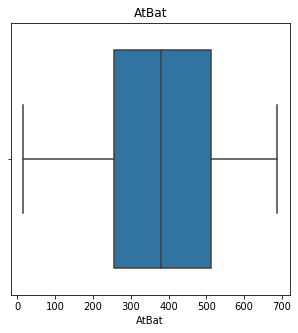

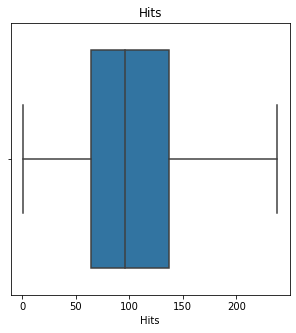

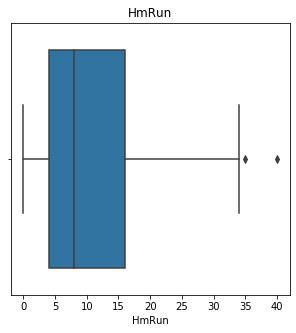

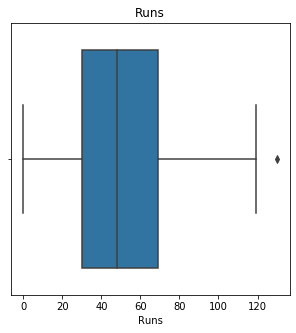

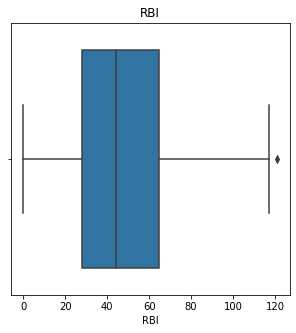

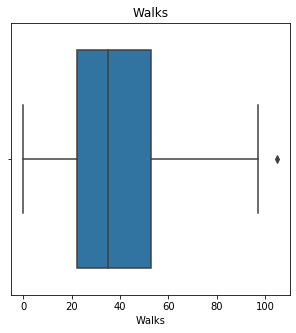

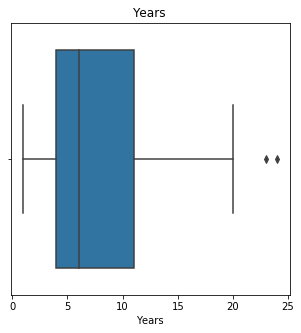

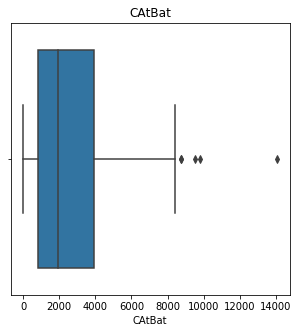

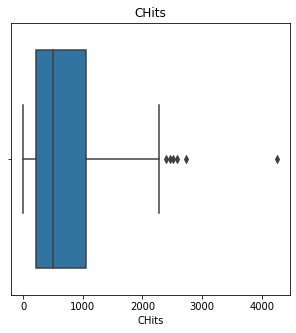

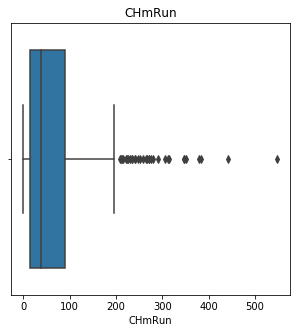

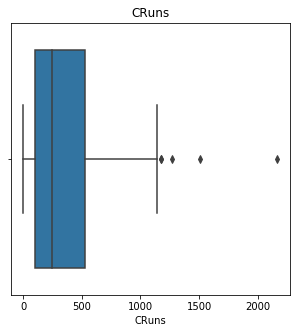

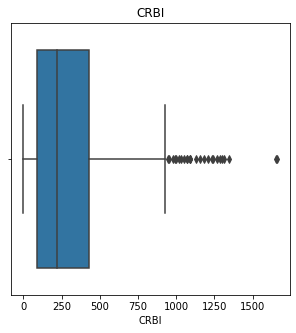

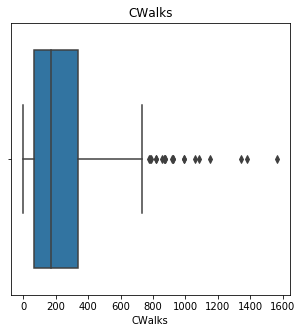

TypeError: unsupported operand type(s) for /: 'str' and 'int'

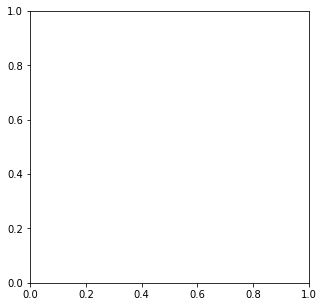

In [69]:

i = 0
for var in numericData.columns[0:15]:
    fig = plt.figure(figsize=(5,5))
    sns.boxplot(x=numericData.columns[i], data=numericData)
    plt.title(numericData.columns[i])
    i+=1
    plt.show()

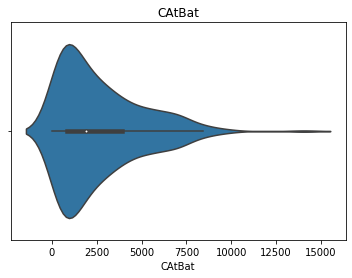

In [72]:
fig, ax = plt.subplots()
colname = numericData.columns[7]
sns.violinplot(x=colname, data=numericData)
plt.title(colname)

# Show the plot
plt.show()

## Problemas encontrados y decisiones

1. Los diagramas de bigotes muestran que, a lo sumo, los 5 últimos registros son los más lejanos. En la siguinete fase estos se eliminarán.